In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-classification/WELFake_Dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
df.shape

(72134, 4)

In [7]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
df.label.value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


<Axes: ylabel='count'>

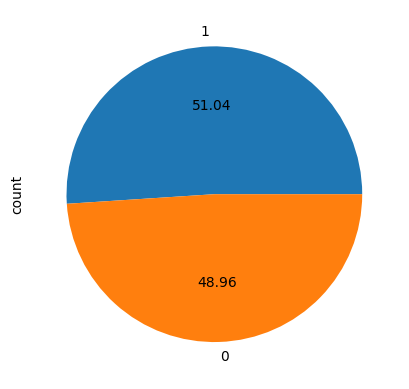

In [11]:
df['label'].value_counts().plot.pie(autopct='%.2f')

In [12]:
X=df.drop(columns=['label'])
y=df['label']

In [14]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [15]:
y.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [16]:
X.shape

(71537, 2)

In [17]:
y.shape

(71537,)

In [18]:
import tensorflow as tf
tf.__version__

2025-08-17 15:32:59.417965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755444779.679319      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755444779.756302      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.18.0'

In [21]:
# Vocab_size = Unique words in our Corpus (entire document)
vocab_size=10000

In [22]:
messages = X.copy()
messages.reset_index(inplace = True)

In [23]:
messages['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [24]:
import nltk
import re

from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

print("Stopwords successfully loaded!")
print(f"Number of stopwords: {len(stop_words)}")


Stopwords successfully loaded!
Number of stopwords: 198


In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    
    # We are substituting everything apart from (a-z, A-Z) with a " " (space)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    
    review = review.lower()
    review = review.split()
    
    # if a word is not in Stop Words,then only we will add it to review (list/array)
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[:30]

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [27]:
max_length = max(len(sentence.split()) for sentence in corpus)

print("Maximum sentence length:", max_length)

Maximum sentence length: 47


In [28]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense, Dropout

In [29]:
# Here, we are converting the text (Corpus) into One Hot Representation for the given vocabulary size (i.e. 10000)
onehot_repr=[one_hot(words,vocab_size) for words in corpus] 

In [30]:
# Note: The one hot representation returns the indexes assigned to a particular word
onehot_repr[:5]

[[6982, 3935, 2065, 7789, 5337, 6156, 5771, 7869, 59, 5560, 8125, 1637],
 [6168,
  4961,
  8409,
  2220,
  7357,
  1202,
  9037,
  2484,
  8288,
  132,
  4077,
  165,
  2433,
  1637],
 [1407, 6298, 7100, 9091, 8597, 3428, 7625, 4548, 6299, 1857, 7693, 475],
 [1411, 160, 8104, 5486, 9329, 6188, 2248, 5529, 8733, 4147, 3908],
 [8477, 7625, 6514, 511, 421, 9267, 5526, 6631, 6514]]

# Embedding

In [31]:
sentence_length = 50

# Adding padding to sentences so that all sentences are of same length i.e 50, to avoid varying input sizes
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ... 5560 8125 1637]
 [   0    0    0 ...  165 2433 1637]
 [   0    0    0 ... 1857 7693  475]
 ...
 [   0    0    0 ... 3943 1684 4186]
 [   0    0    0 ... 4874 9690 7915]
 [   0    0    0 ... 9500 9167 3312]]


In [32]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 6982, 3935, 2065, 7789, 5337, 6156,
       5771, 7869,   59, 5560, 8125, 1637], dtype=int32)

# LSTM Model

In [33]:
embedding_vector_features=100 # We will have a vector representation to text with only 100 features 

model=Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model.add(LSTM(100)) 
model.add(Dropout(0.2))

# LSTM layer (output) is fully connected to the Dense layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-08-17 15:38:18.635592: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
X_final.shape,y_final.shape

((71537, 50), (71537,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [36]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.8432 - loss: 0.3404 - val_accuracy: 0.9063 - val_loss: 0.2273
Epoch 2/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9264 - loss: 0.1827 - val_accuracy: 0.9065 - val_loss: 0.2352
Epoch 3/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9459 - loss: 0.1386 - val_accuracy: 0.9080 - val_loss: 0.2454
Epoch 4/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9605 - loss: 0.0999 - val_accuracy: 0.9056 - val_loss: 0.2859
Epoch 5/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9692 - loss: 0.0768 - val_accuracy: 0.9046 - val_loss: 0.3263
Epoch 6/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9779 - loss: 0.0553 - val_accuracy: 0.9026 - val_loss: 0.3627
Epoch 7/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9854 - loss: 0.0401 - val_accuracy: 0.9036 - val_loss: 0.4367
Epoch 8/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9885 -

# Performance Metrics

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

acc = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step
[[6300  781]
 [ 596 6631]]


In [38]:
print(acc)

0.9037601341906626


# Stacked LSTM Model

In [39]:
embedding_vector_features=100
model1=Sequential()
model1.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model1.add(LSTM(100,return_sequences=True)) 
model1.add(Dropout(0.2))

model1.add(LSTM(50,return_sequences=True)) 
model1.add(Dropout(0.1))

model1.add(LSTM(20)) 
model1.add(Dropout(0.1))

model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 177s 93ms/step - accuracy: 0.8286 - loss: 0.3598 - val_accuracy: 0.9077 - val_loss: 0.2277
Epoch 2/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 160s 90ms/step - accuracy: 0.9300 - loss: 0.1795 - val_accuracy: 0.9080 - val_loss: 0.2337
Epoch 3/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 162s 91ms/step - accuracy: 0.9471 - loss: 0.1365 - val_accuracy: 0.9076 - val_loss: 0.2403
Epoch 4/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 160s 90ms/step - accuracy: 0.9607 - loss: 0.1025 - val_accuracy: 0.9072 - val_loss: 0.2938
Epoch 5/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 161s 90ms/step - accuracy: 0.9742 - loss: 0.0700 - val_accuracy: 0.9015 - val_loss: 0.3143
Epoch 6/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 164s 91ms/step - accuracy: 0.9806 - loss: 0.0532 - val_accuracy: 0.9020 - val_loss: 0.3487
Epoch 7/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 161s 90ms/step - accuracy: 0.9855 - loss: 0.0401 - val_accuracy: 0.9017 - val_loss: 0.4257
Epoch 8/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 162s 91ms/step - accuracy: 

In [41]:
y_log_1 = model1.predict(X_test)
y_pred_1 = np.where(y_log_1>0.5,1,0)

acc_1 = accuracy_score(y_test, y_pred_1)
print(acc_1)

print()

confusion_mat_1 = confusion_matrix(y_test, y_pred_1)
print(confusion_mat_1)

448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step
0.9035504612804026

[[6295  786]
 [ 594 6633]]


# Bi-Directional LSTM Model

In [42]:
embedding_vector_features=150
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model2.add(Bidirectional(LSTM(200))) 
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10, batch_size=120)

Epoch 1/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 163s 327ms/step - accuracy: 0.7911 - loss: 0.4313 - val_accuracy: 0.9043 - val_loss: 0.2333
Epoch 2/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 200s 324ms/step - accuracy: 0.9209 - loss: 0.1963 - val_accuracy: 0.9070 - val_loss: 0.2248
Epoch 3/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 154s 323ms/step - accuracy: 0.9396 - loss: 0.1539 - val_accuracy: 0.9057 - val_loss: 0.2363
Epoch 4/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 155s 325ms/step - accuracy: 0.9537 - loss: 0.1259 - val_accuracy: 0.9057 - val_loss: 0.2478
Epoch 5/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 155s 325ms/step - accuracy: 0.9627 - loss: 0.1045 - val_accuracy: 0.9041 - val_loss: 0.2788
Epoch 6/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 155s 325ms/step - accuracy: 0.9716 - loss: 0.0799 - val_accuracy: 0.9043 - val_loss: 0.3035
Epoch 7/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 163s 343ms/step - accuracy: 0.9784 - loss: 0.0633 - val_accuracy: 0.8975 - val_loss: 0.3713
Epoch 8/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 154s 324ms/step - accuracy: 0.9823 -

In [44]:
y_log_2 = model2.predict(X_test)
y_pred_2 = np.where(y_log_2>0.5,1,0)

acc_2 = accuracy_score(y_test, y_pred_2)
print(acc_2)

print()

confusion_mat_2 = confusion_matrix(y_test, y_pred_2)
print(confusion_mat_2)

448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step
0.898448420464076

[[6306  775]
 [ 678 6549]]


In [45]:
model.save("lstm_fake_news_model.h5")

import shutil
shutil.move("lstm_fake_news_model.h5", "/kaggle/working/lstm_fake_news_model.h5")

'/kaggle/working/lstm_fake_news_model.h5'